This lab demonstrates how supervised machine learning can be applied to medical data to support treatment decisions. Using patient information such as age, sex, blood pressure, and cholesterol, a Decision Tree classifier is trained to predict which of five drugs a patient is most likely to respond to. The model is then evaluated and used to make predictions for new patients.

In [23]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## understand the data better

In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### we should convert the catagorical features to numerical

In [30]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


### map the different drugs to a numerical value

In [31]:
my_data['Drug'] = my_data['Drug'].map({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4})
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


### check if there are any missing values in the dataset

In [32]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [34]:
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


### find the correlation of the input variables with the target variable and identify the features most significantly affecting the target.

In [38]:
my_data.corr()['Drug']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug           1.000000
Name: Drug, dtype: float64

the drug recommendation is mostly correlated with the Na_to_K and BP features.

## Modeling

### 1- spliting the dataset

In [76]:
X = my_data.drop(['Drug'],axis=1)
y = my_data.Drug
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=32)

### 2- Create the Decision Tree mode

In [77]:
dr = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

### 3- training the model


In [78]:
dr.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Making Predictions

In [79]:
y_predicted = dr.predict(X_test)
y_predicted

array([4, 1, 3, 0, 4, 4, 0, 4, 4, 3, 3, 3, 3, 4, 2, 4, 4, 0, 4, 0, 4, 0,
       4, 3, 3, 4, 1, 4, 3, 4, 4, 2, 2, 4, 4, 4, 4, 0, 4, 3, 0, 4, 4, 3,
       4, 3, 4, 0, 4, 3, 1, 4, 3, 3, 4, 1, 3, 4, 1, 4])

## Model Evaluation

In [80]:
metrics.accuracy_score(y_test, y_predicted)

0.9833333333333333

## Visualize the tree

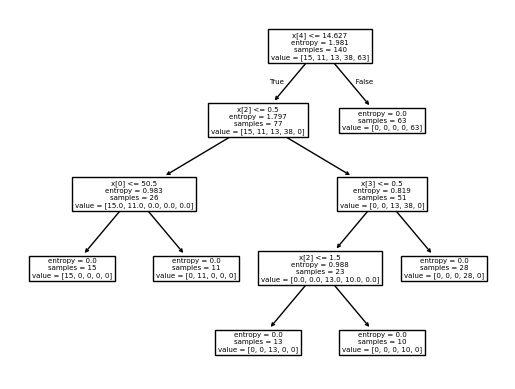

In [83]:
## generate the tree plot
plot_tree(dr)
plt.show()